## Title (文章标题): 基于`Logistic`模型的大型邮轮疫情分析预测

### Summary (总结)

本文分析`Daimond Princess(`钻石公主号`)`邮轮的疫情传播特征, 建立了基于`Logistic`传染病模型的大型邮轮疫情时域发展情形, 以不同传播速率为变量, 通过拟合不同发展情形下`Logistic`模型中传染病增长率的特定值, 对`Daimond Princess(`钻石公主号`)`邮轮在未及时疏散旅客和未采任何取防控措施这2种情形下患病人数发展趋势进行了预测。

结果显示, 上述2种情形患病人数远高于实际患病人数, 其中在未采任何预防控措施的情形下的传播速度更高, 显示出相关方在母港采取的隔离及疏散措施具有一定效果, 但在船隔离仍不是最佳选择。

从邮轮设计、公约完善、应急预案建设等方面提出了建议, 为大型邮轮疫情防控提供参考。

### 建立传染病问题的`Logistic`模型

设1个区域中有$x_m$个人，其中患病$x_0$人，今后若干天的增长率$r>0$。

记$t$天后的病例数为$x(t)$，则预报公式为
$$ x(t) = x_0 (1 + r) ^{(1)} \tag{1} $$
可以变换为常微分方程
$$ \left\{
    \begin{aligned}
    \frac{\mathrm{d}x}{\mathrm{d}t} &= rx(t) \\
    x|_{t=0} &= x_0
    \end{aligned}
\right. \tag{2} $$
在暴露于传染源的人数一定的情况下，随着传染病传播病例数目的增加，传染病的增长率会随之减小。

设$r$为关于$x$的减函数 $r(x) = r_0 - s \cdot x(t)$ ，其中
$$s, r_0, r(x) > 0 \tag{3} $$
又 $r(x_m)=0$ ，则有
$$ s = \frac{r_0}{x_m} \tag{4} $$
$$ r(x) = r_0 (1 - \frac{x(t)}{x_m}) \tag{5} $$
则有
$$ \left\{
    \begin{aligned}
    \frac{\mathrm{d}x}{\mathrm{d}t} &= r_0 (1 - \frac{x(t)}{x_m}) x(t) \\
    x|_{t=0} &= x_0
    \end{aligned}
\right. \tag{6} $$
解得
$$ x(t) = \frac{x_m}{1 + (\frac{x_m}{x_0} - 1)\exp{\{-r_0 t\}}} \tag{7} $$
假设初始时刻患病$x_0 = 39$人且增长率$r_0 = 0.28$，设计程序及运行结果如下:

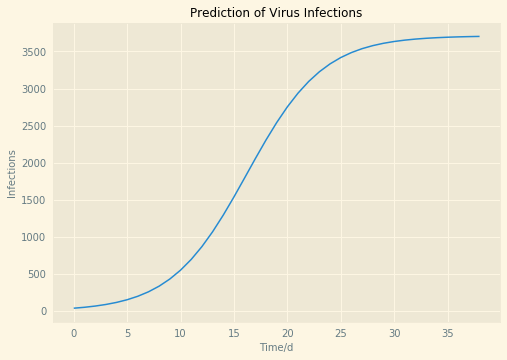

In [14]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("solarized-light")

x0, x_m, r0 = 39, 3711, .28
x = lambda t : x_m / (1 + (x_m / x0 - 1) * np.exp(-r0 * t))
plt.title("Prediction of Virus Infections")
plt.xlabel("Time/d")
plt.ylabel("Infections")
plt.plot(x(np.arange(39)))